<a href="https://colab.research.google.com/github/AlsT26/Tubes-AJS/blob/main/Tubes-AJS-community_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
data=pd.read_csv("./organization.csv")

In [ ]:
data.head()

,Organisation,member
0,ethereum,Oleh Aldekein
1,ethereum,None
2,ethereum,Frank Szendzielarz
3,ethereum,Kolby Moroz Liebl
4,ethereum,Marius van der Wijden


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10598 entries, 0 to 10597
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Organisation  10598 non-null  object
 1   member        10598 non-null  object
dtypes: object(2)
memory usage: 165.7+ KB


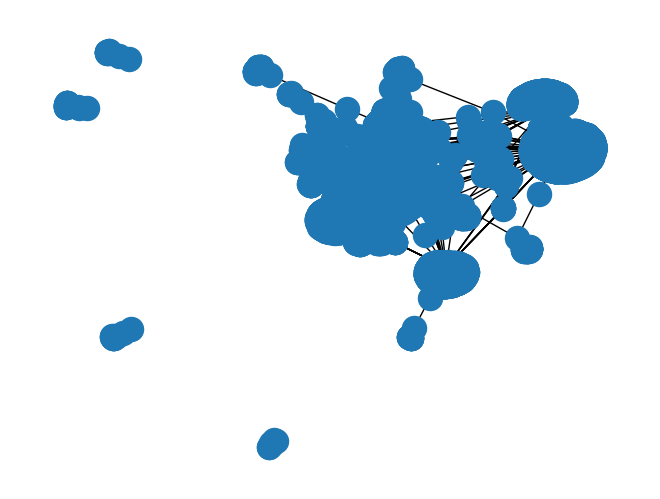

In [ ]:
graph = nx.from_pandas_edgelist(data, source='Organisation', target='member')
nx.draw(graph)

In [ ]:
node = graph.nodes()
df_node = pd.DataFrame(node)
df_node.rename(columns={0:"Node"})

,Node
0,ethereum
1,Oleh Aldekein
2,None
3,Frank Szendzielarz
4,Kolby Moroz Liebl
...,...
8915,Chris Colborne
8916,Zachary Danz
8917,zsy
8918,Zuhair Parvez


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24034 (\N{CJK UNIFIED IDEOGRAPH-5DE2}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 40527 (\N{CJK UNIFIED IDEOGRAPH-9E4F}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 38463 (\N{CJK UNIFIED IDEOGRAPH-963F}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHE

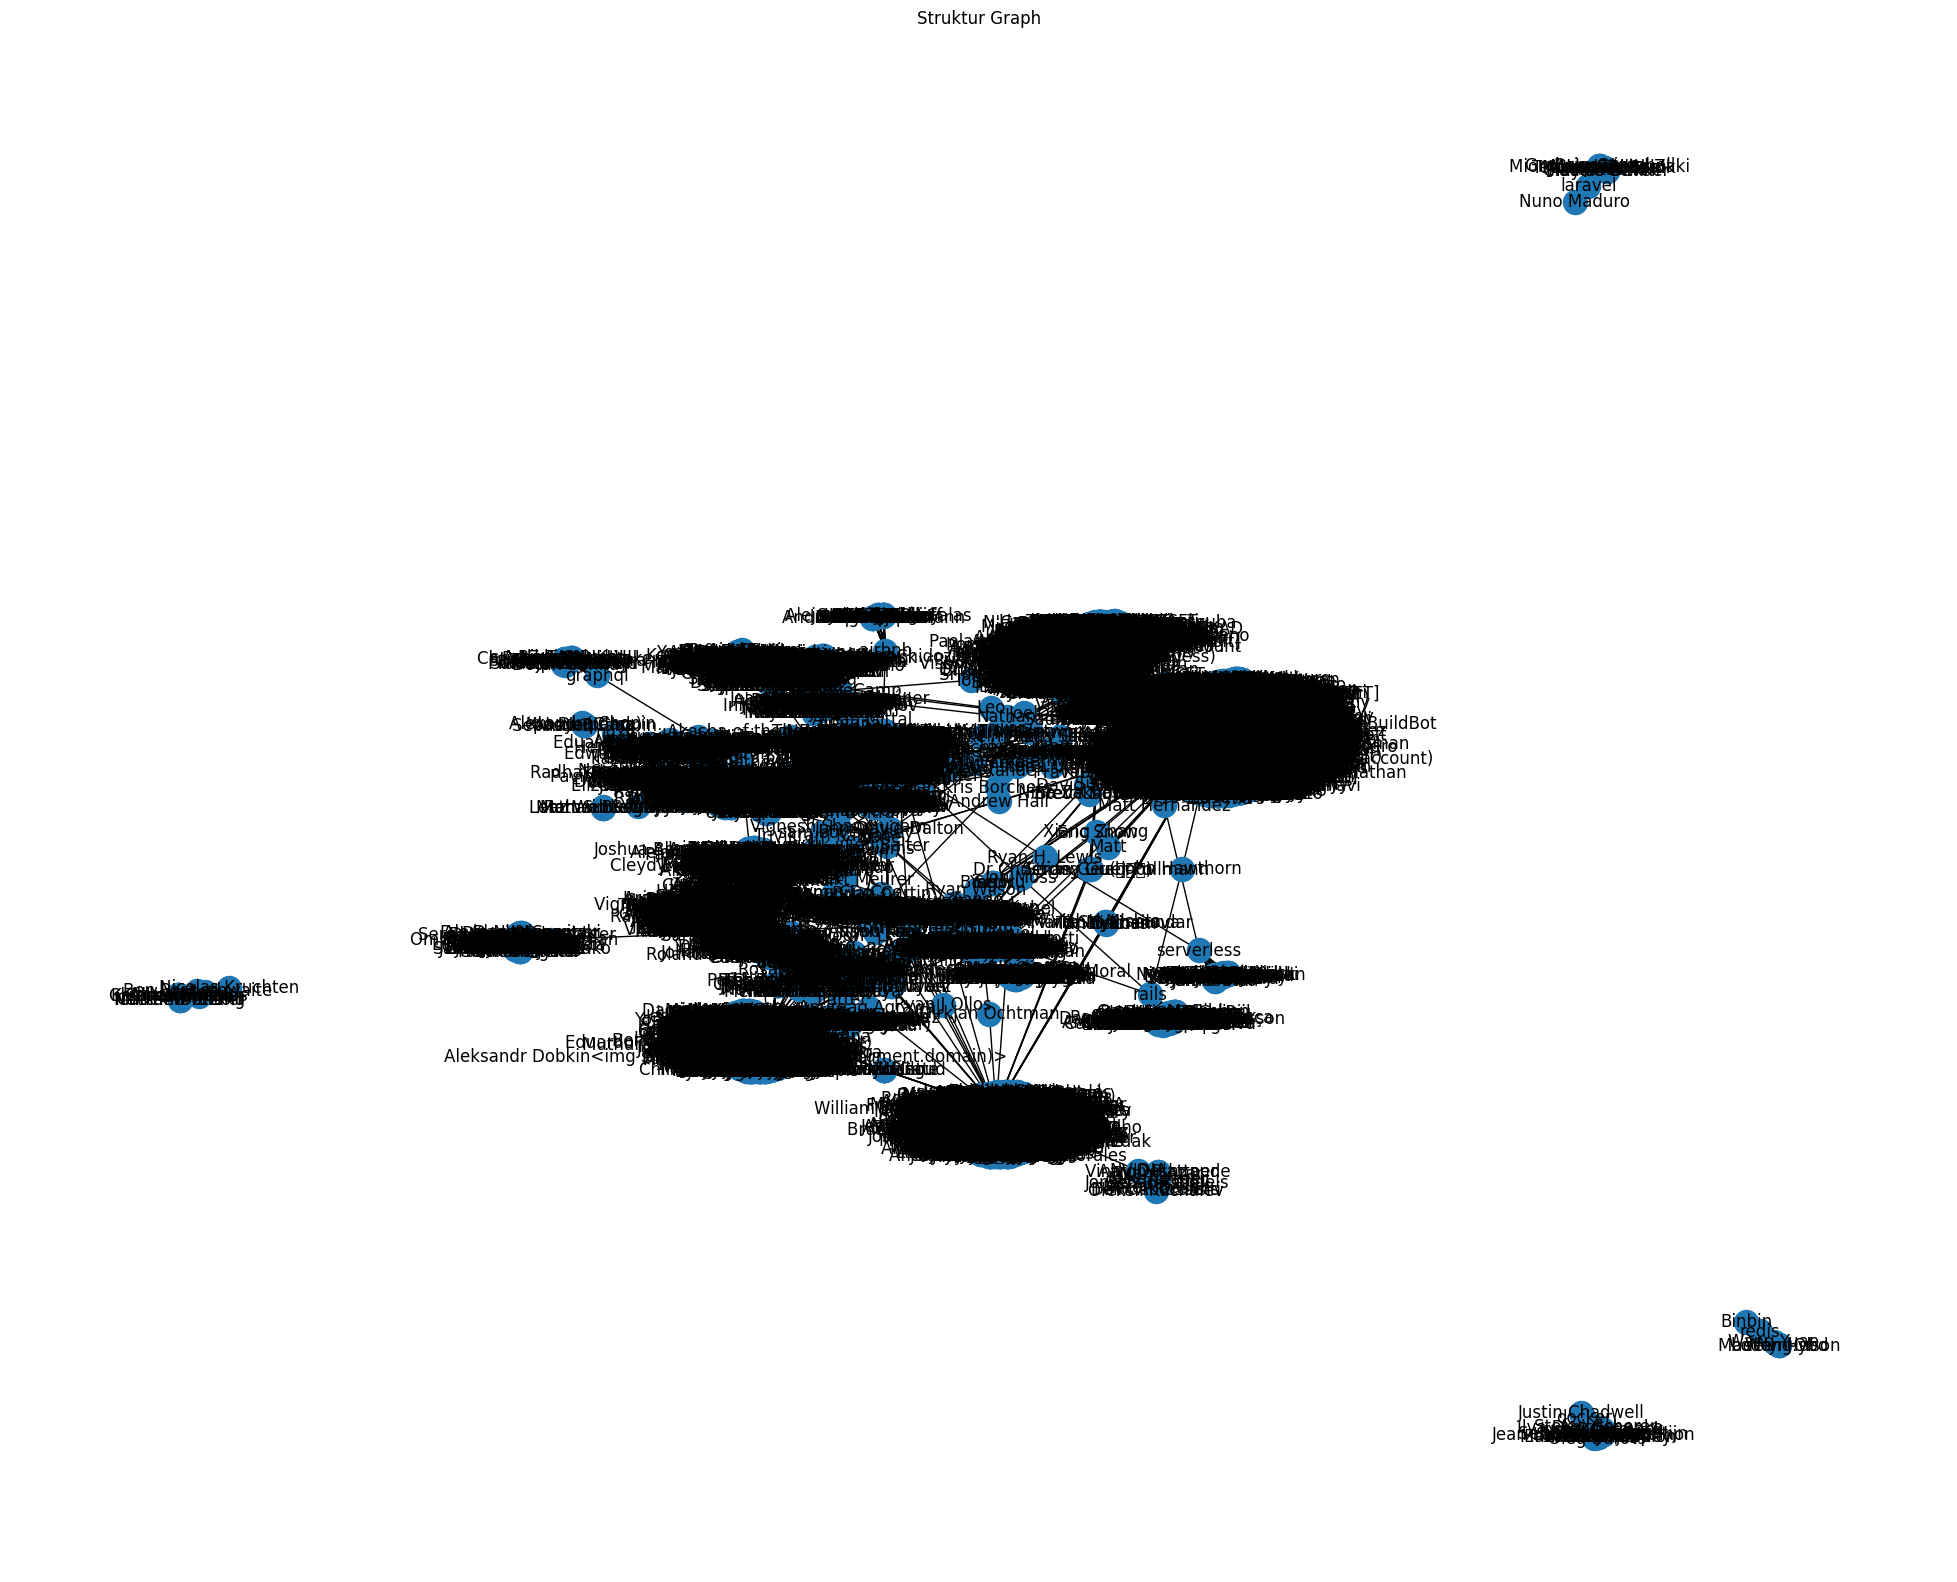

In [ ]:
nx.draw
nx.draw_networkx
plt.figure(figsize=(25,20))
plt.title("Struktur Graph")
nx.draw(graph, with_labels=True)

In [ ]:
temp = []
tap = nx.degree(graf_df)
for i in tap:
  temp.append([i[0],i[1]])

sort_deg = pd.DataFrame(temp)
sort_deg.sort_values(1,axis=0, ascending= False, inplace = True)
sort_deg=sort_deg.rename(columns={0: 'Organisation', 1: 'degree'})
sort_deg.head(20)

,Organisation,degree
5595,microsoft,3917
3194,Azure,1617
1229,apache,1075
435,google,803
2501,nodejs,364
2853,elastic,170
3029,aws,169
250,reactjs,139
5316,python,119
5504,facebook,108


In [ ]:
df_visualisasi = pd.DataFrame(sort_deg[1:6])
df_visualisasi

,Organisation,degree
3194,Azure,1617
1229,apache,1075
435,google,803
2501,nodejs,364
2853,elastic,170


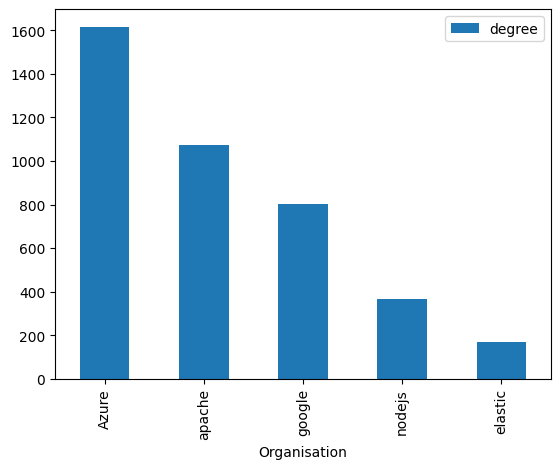

In [ ]:
df = pd.DataFrame(df_visualisasi, columns=['Organisation','degree']).copy()
df.plot(x='Organisation', y='degree', kind='bar')
plt.show()

In [ ]:
# Define comunity
graph

In [ ]:
type(graph)

networkx.classes.graph.Graph

In [ ]:
edge_df = nx.to_pandas_edgelist(graph)
edge_df

,source,target
0,ethereum,Oleh Aldekein
1,ethereum,None
2,ethereum,Frank Szendzielarz
3,ethereum,Kolby Moroz Liebl
4,ethereum,Marius van der Wijden
...,...,...
9651,microsoft,Chris Colborne
9652,microsoft,Zachary Danz
9653,microsoft,zsy
9654,microsoft,Zuhair Parvez


In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

# modularity deteksi komunitas
community = sorted(greedy_modularity_communities(graph), key=len, reverse=True)

In [ ]:
# communitie dan member yang terbentuk
for i,c in enumerate(community):
  if len(c) > 2:
    print('komunitas '+str(i+1)+' :', list(c))

komunitas 1 : ['Jen Downs', 'Jian-Tao Sun', 'Bryan Trach', 'Ivan (Vanya) Kashperuk', 'Timo Klimmer', 'Richard Guthrie', 'Gordey Doronin', 'Vikranth Thati', 'Mohamed Reda Elkhadiri', 'Michelle Bergeron', 'Pablo Castro', 'Hansel Ip', 'Naresh Joshi', 'Marc van Eijk', 'Preeti Krishna', 'Arthur Yasinski', 'Nich', 'shams', 'Peter Waldschmidt', 'DevOps User', 'David Risney', 'Scott Hanselman', 'Changming Sun', 'Skyler Jokiel', 'Tom Aaron', 'Andrew Schonhoffer', 'Christopher MANEU', 'Katja Hofmann', 'Alex Bain', 'Rakesh Singh', 'Sandeep Somavarapu', 'Edgar Ruiz', 'Eliot Graff', 'Chenxi Zhao', 'Clayton', 'Sanjeev Dwivedi', 'James Lenell', 'Hariharan Seshadri', 'Chris Whytock', 'Dmitri Smirnov', 'Priyank Mandavawala', 'Miho Yamamoto', 'Sohail Rajdev', 'Hao Fang', 'Jorge Villasenor', 'Daniel Li', 'vlast', 'Ben Weedon', 'Oleg Moskalenko', 'Doug Seelinger', 'Anže Vodovnik', 'Jonathan Gardner (MSFT)', 'Robert Onulak', 'Madhav Thelakkat', 'Duong Nguyen-Huu', 'ghui', 'Valentin Isac', 'Joe Flint', 'Mic

In [ ]:
def GetColor(i, r_off=1, g_off=1, b_off=1):
  r0, g0, b0 = 0,0,0
  n=16
  low, high = 0.1, 0.9
  span = high - low
  r = low + span * (((i + r_off)*3) % n) / (n-1)
  g = low + span * (((i + g_off)*3) % n) / (n-1)
  b = low + span * (((i + b_off)*3) % n) / (n-1)
  return(r,g,b)

<function matplotlib.pyplot.show(close=None, block=None)>

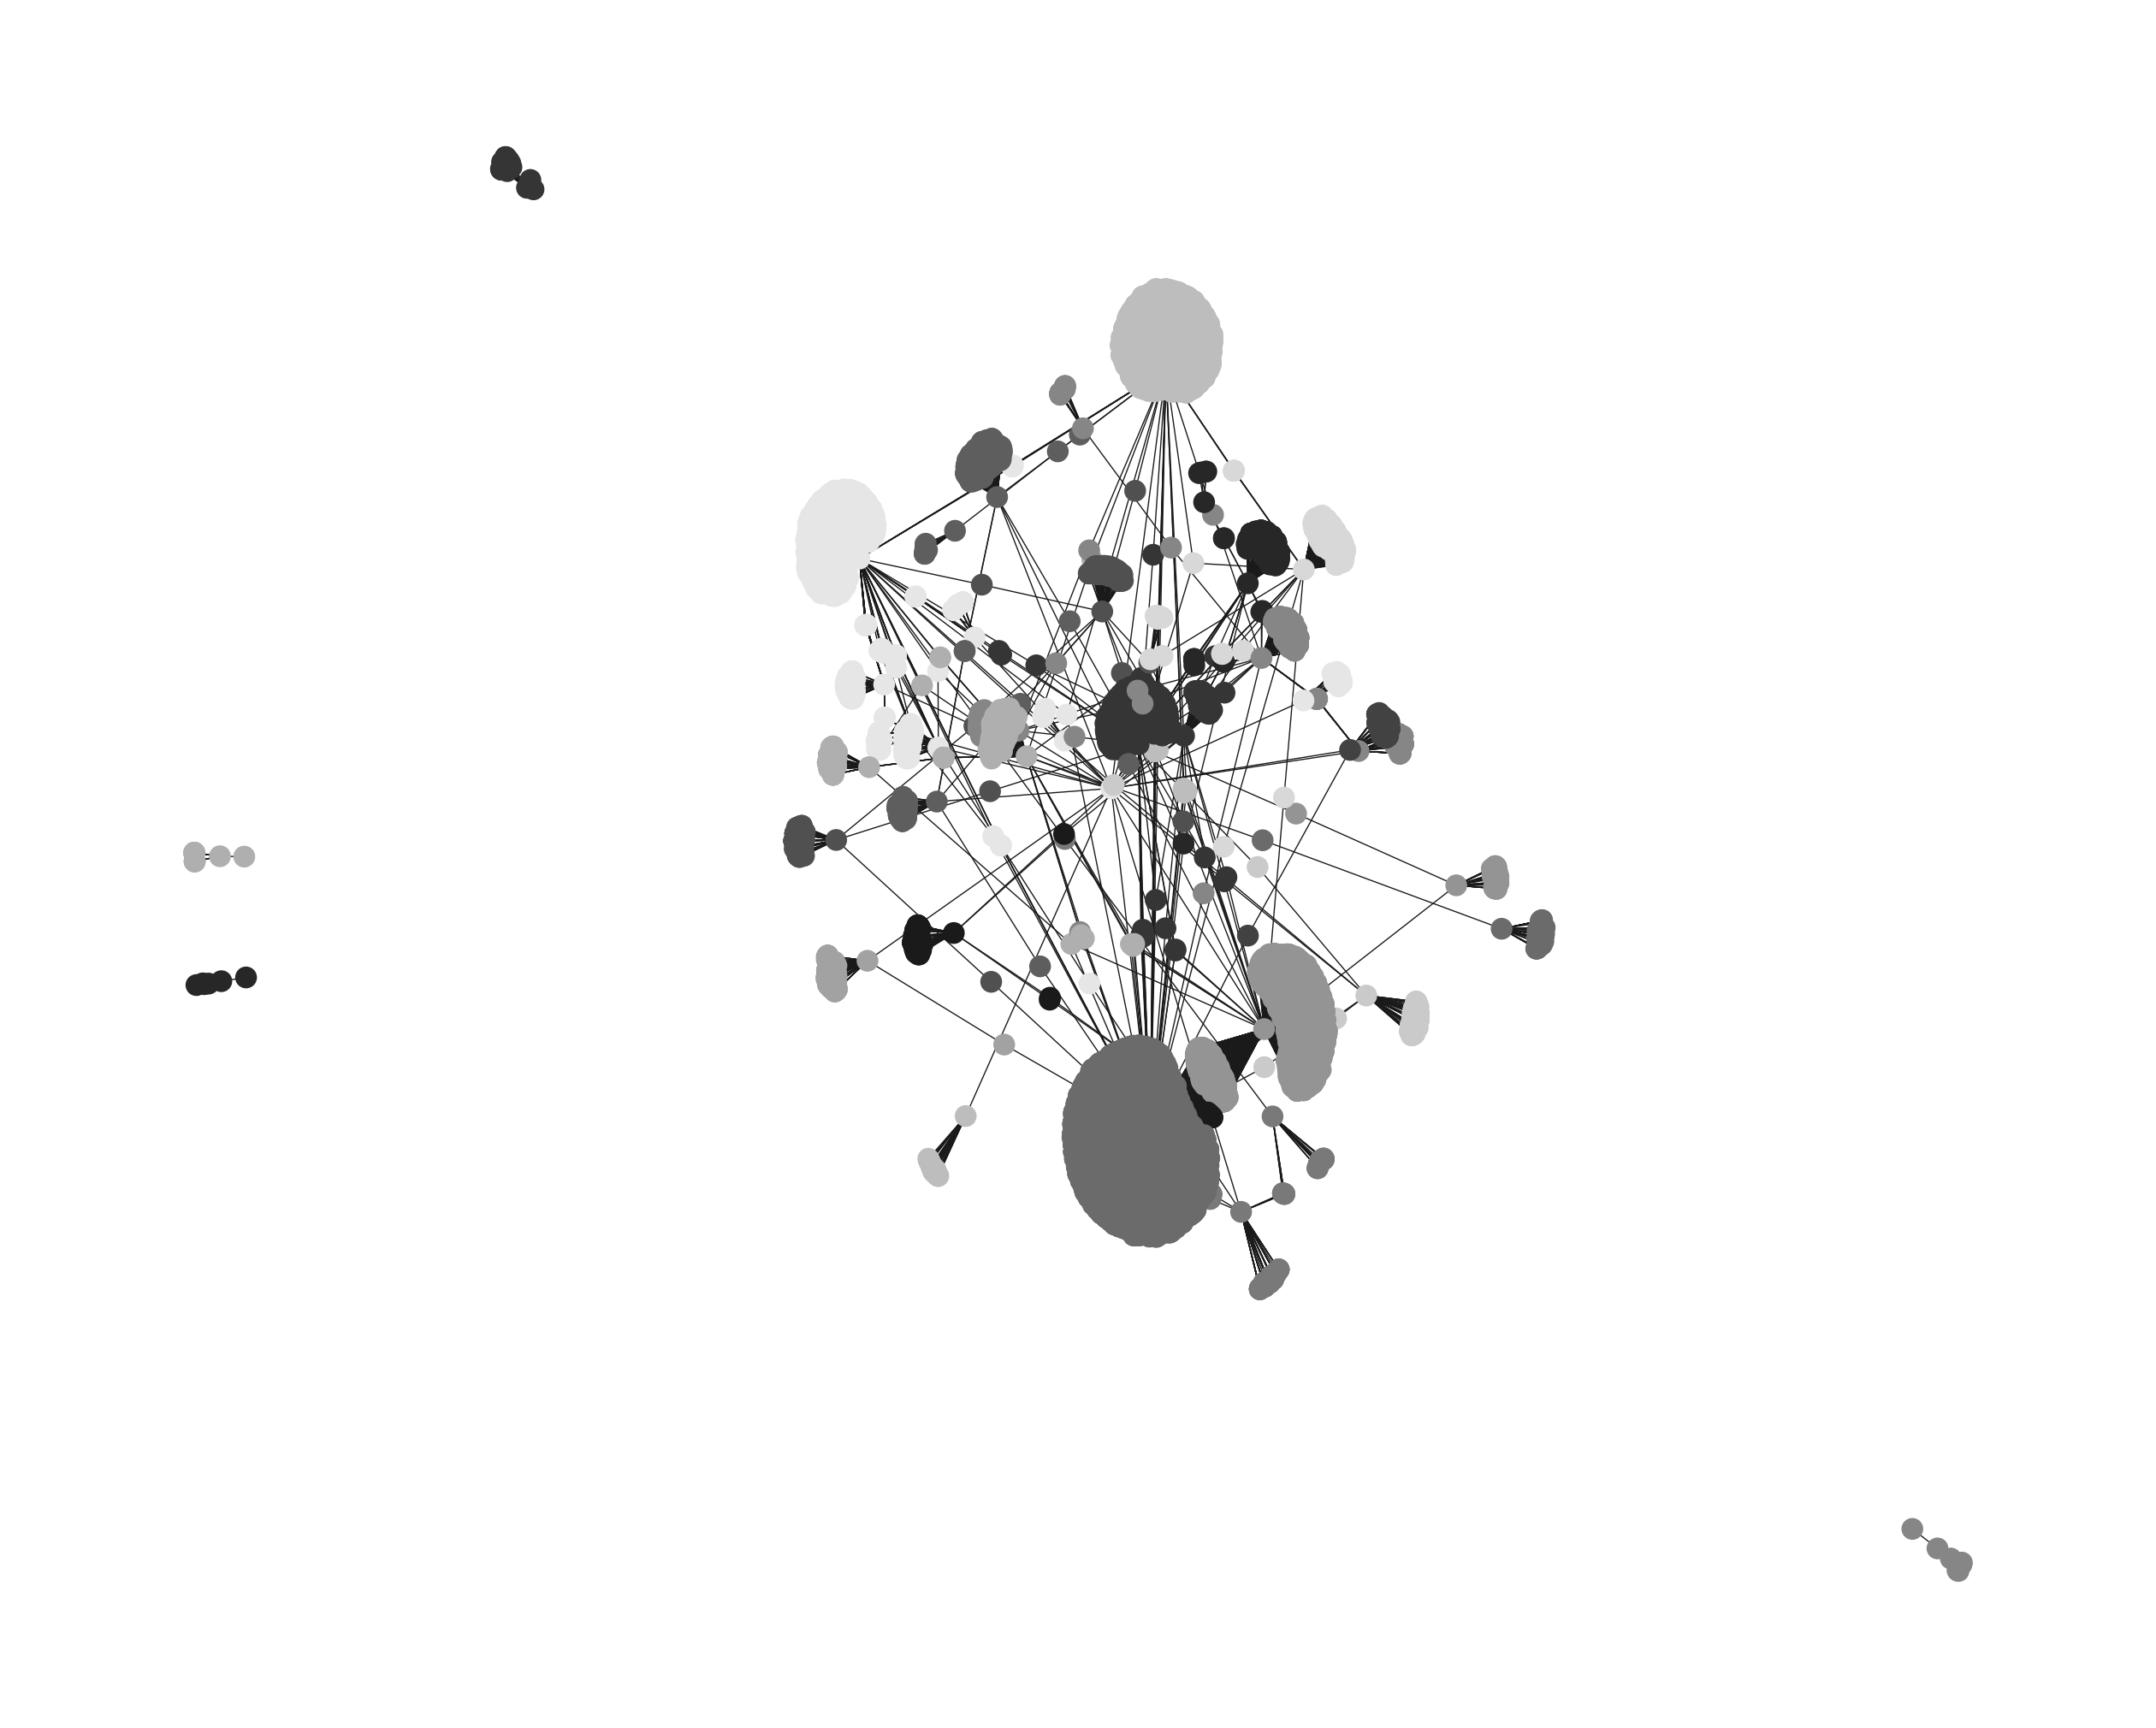

In [ ]:
# node community
for c, l_c in enumerate(community):
  for v in l_c:
    graph.nodes[v]['community'] = c + 1

color=[]
for v in graph.nodes:
  color.append(GetColor(graph.nodes[v]['community']))

#visualsiasi network
plt.figure(figsize=(25,20))
nx.draw(graph, with_labels=False, node_color=color)
plt.show

In [ ]:
from networkx.algorithms.community import louvain_communities

community2 = sorted(louvain_communities(graph), key=len, reverse=True)

In [ ]:
# communitie dan member yang terbentuk
for i,c in enumerate(community2):
  if len(c) > 2:
    print('komunitas '+str(i+1)+' :', list(c))

komunitas 1 : ['Jen Downs', 'Jian-Tao Sun', 'Bryan Trach', 'Ivan (Vanya) Kashperuk', 'Richard Guthrie', 'Timo Klimmer', 'Gordey Doronin', 'Vikranth Thati', 'Mohamed Reda Elkhadiri', 'Michelle Bergeron', 'Hansel Ip', 'Pablo Castro', 'Marc van Eijk', 'Naresh Joshi', 'Preeti Krishna', 'Arthur Yasinski', 'Nich', 'shams', 'Peter Waldschmidt', 'DevOps User', 'David Risney', 'Scott Hanselman', 'Changming Sun', 'Skyler Jokiel', 'Tom Aaron', 'Andrew Schonhoffer', 'Christopher MANEU', 'Katja Hofmann', 'Alex Bain', 'Rakesh Singh', 'Sandeep Somavarapu', 'Edgar Ruiz', 'Eliot Graff', 'Chenxi Zhao', 'Clayton', 'Sanjeev Dwivedi', 'James Lenell', 'Chris Whytock', 'Hariharan Seshadri', 'Dmitri Smirnov', 'Priyank Mandavawala', 'Miho Yamamoto', 'Sohail Rajdev', 'Hao Fang', 'Jorge Villasenor', 'Daniel Li', 'vlast', 'Ben Weedon', 'Doug Seelinger', 'Oleg Moskalenko', 'Anže Vodovnik', 'Jonathan Gardner (MSFT)', 'Robert Onulak', 'Madhav Thelakkat', 'Duong Nguyen-Huu', 'ghui', 'Valentin Isac', 'Joe Flint', 'Mic